In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-shape-dataset/Female_Face_Dataset/square_fair/square_fair_58.jpg
/kaggle/input/face-shape-dataset/Female_Face_Dataset/square_fair/square_fair_53.jpg
/kaggle/input/face-shape-dataset/Female_Face_Dataset/square_fair/square_fair_64.jpg
/kaggle/input/face-shape-dataset/Female_Face_Dataset/square_fair/square_fair_52.jpg
/kaggle/input/face-shape-dataset/Female_Face_Dataset/square_fair/square_fair_35.jpg
/kaggle/input/face-shape-dataset/Female_Face_Dataset/square_fair/square_fair_18.jpg
/kaggle/input/face-shape-dataset/Female_Face_Dataset/square_fair/square_fair_67.jpg
/kaggle/input/face-shape-dataset/Female_Face_Dataset/square_fair/square_fair_42.jpg
/kaggle/input/face-shape-dataset/Female_Face_Dataset/square_fair/square_fair_62.jpg
/kaggle/input/face-shape-dataset/Female_Face_Dataset/square_fair/square_fair_44.jpg
/kaggle/input/face-shape-dataset/Female_Face_Dataset/square_fair/square_fair_19.jpg
/kaggle/input/face-shape-dataset/Female_Face_Dataset/square_fair/square_fair

In [2]:
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.metrics import f1_score
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import scikitplot as skplt
import tensorflow as tf
import seaborn as sns
import numpy as np
import keras
import cv2
import os
import warnings
warnings.filterwarnings('ignore')

2024-06-26 14:00:23.436994: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 14:00:23.437133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 14:00:23.550172: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import os
import cv2

labels = ['heart_caramel', 'heart_fair',"oval_caramel","oval_fair","round_fair","round_tan","square_fair","square_wheatish"]
img_size_x = 650
img_size_y = 450

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))  # Read the image
                gray_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                
                # Resize the grayscale image to preferred size
                resized_arr = cv2.resize(gray_arr, (img_size_x, img_size_y))
                
                data.append([resized_arr, class_num])
            except Exception as e:
                print(f"Error loading image {img}: {e}")
    return data


In [4]:
train_data = get_data('/kaggle/input/face-shape-dataset/Female_Face_Dataset')
# test_data = get_data('/kaggle/input/edata2/dataset_split/test/')
val_data = get_data('/kaggle/input/face-shape-dataset/Female_Face_Dataset')
print("Images converted to array")

Images converted to array


In [5]:
import numpy as np

# Assuming train_data, test_data, and val_data are lists of tuples containing (image, label)

x_train = np.array([feature for feature, label in train_data]) / 255.0
y_train = np.array([label for feature, label in train_data])

# x_test = np.array([feature for feature, label in test_data]) / 255.0
# y_test = np.array([label for feature, label in test_data])

x_val = np.array([feature for feature, label in val_data]) / 255.0
y_val = np.array([label for feature, label in val_data])

# Reshape without cropping
x_train = x_train.reshape(-1, 450, 650, 1)
# x_test = x_test.reshape(-1, 450, 650, 1)
x_val = x_val.reshape(-1, 450, 650, 1)

print('Training data shape', x_train.shape)
print('Validation data shape', x_val.shape)

Training data shape (565, 450, 650, 1)
Validation data shape (565, 450, 650, 1)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(450, 650, 1)))  # Adjusted input shape
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(8, activation="softmax"))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 450, 650, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 225, 325, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 225, 325, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 112, 162, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 112, 162, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 56, 81, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 56, 81, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 28, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 28, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 71680)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     9,175,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,241,192 (35.25 MB)

 Trainable params: 9,241,192 (35.25 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [17]:
history = model.fit(x_train, y_train, epochs=30,validation_data=(x_val, y_val))

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 389ms/step - accuracy: 0.1643 - loss: 2.0034 - val_accuracy: 0.3133 - val_loss: 1.8744
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.1934 - loss: 1.8992 - val_accuracy: 0.2796 - val_loss: 1.8413
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.3016 - loss: 1.8336 - val_accuracy: 0.3168 - val_loss: 1.7921
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.3339 - loss: 1.7722 - val_accuracy: 0.3664 - val_loss: 1.7554
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.3635 - loss: 1.7443 - val_accuracy: 0.3735 - val_loss: 1.6652
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.3461 - loss: 1.6607 - val_accuracy: 0.3717 - val_loss: 1.6372
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.3972 - loss: 1.6167 - val_accuracy: 0.4478 - val_loss: 1.5090
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.4882 - loss: 1.4885 - val_accuracy: 0

In [18]:
model.save("/kaggle/working/face_model_v1.h5")

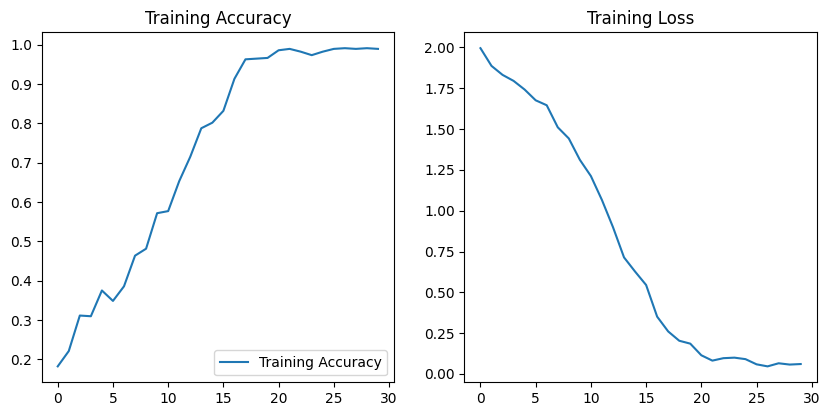

In [19]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(30)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.title('Training Loss')
plt.show()


In [21]:
model_path = 'face_model_v1.h5'  # Adjust this path if necessary
model = tf.keras.models.load_model(model_path)

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the function to preprocess the image
def preprocess_image(img_path, img_size):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image directly as grayscale
    resized_img = cv2.resize(img, (img_size[0], img_size[1]))  # Resize to img_size x img_size
    normalized_img = resized_img / 255.0  # Normalize to [0, 1]
    return normalized_img


# Define the function to predict the class of the image
def predict_image(model, img_path, img_size, labels):
    # Preprocess the image
    preprocessed_img = preprocess_image(img_path, img_size)
    # Expand dimensions to match the input shape expected by the model
    img_array = np.expand_dims(preprocessed_img, axis=-1)  # Expand the last dimension
    img_array = np.expand_dims(img_array, axis=0)  # Expand the batch dimension
    img_array/=255.0
    
    # Make prediction
    prediction = model.predict(img_array)
    # Interpret prediction
    prediction_class=np.argmax(prediction[0])
    predicted_class = labels[prediction_class]
    return predicted_class, prediction[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


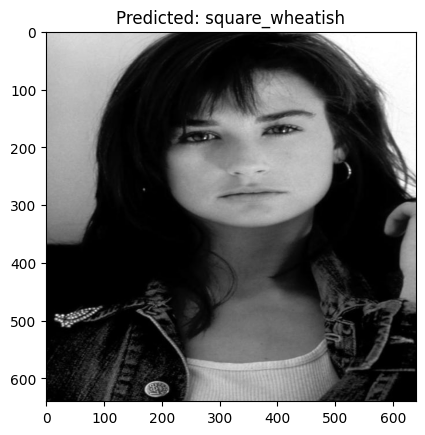

In [41]:
img_size = [650, 450]
labels = ['heart_caramel', 'heart_fair',"oval_caramel","oval_fair","round_fair","round_tan","square_fair","square_wheatish"]
face_img = '/kaggle/input/face-shape-dataset/Female_Face_Dataset/square_wheatish/square_wheatish_100.jpg'

predicted_class,predicted_prob= predict_image(model, face_img, img_size, labels)

# Optionally display the image
plt.imshow(cv2.imread(face_img, cv2.IMREAD_GRAYSCALE), cmap='gray')  # Read image as grayscale and plot with grayscale colormap
plt.title(f"Predicted: {predicted_class}")
plt.show()